<a href="https://colab.research.google.com/github/Bhupendra-glitch/Experimentation-Uplift-Modeling/blob/main/Experimentation_Uplift_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Intro**


# Import liberies

**Quick View**

In [1]:
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

seed = 47

In [2]:
pdf_train = pd.read_csv('/content/pdf (1).csv')
pdf = pdf_train.copy()
pdf.shape

(64023, 196)

In [3]:
pdf.head()

,CardHolder,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,...,sale_sum_6m_g24,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m
0,16095858,47.0,3.0,22.0,19.0,3.0,28.0,8.0,7.0,6.0,...,3141.25,356.67,237.25,283.84,3648.23,1195.37,535.42,1.7078,0.2798,0.3008
1,15906620,57.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,...,113.39,62.69,58.71,87.01,179.83,0.00,122.98,0.0000,0.0000,0.0000
2,16495466,38.0,7.0,0.0,15.0,4.0,9.0,5.0,9.0,14.0,...,1239.19,533.46,83.37,593.13,1217.43,1336.83,3709.82,0.0000,NaN,0.0803
3,16570217,65.0,6.0,3.0,25.0,2.0,10.0,14.0,11.0,8.0,...,139.68,1849.91,360.40,175.73,496.73,172.58,1246.21,0.0000,0.0000,0.0000
4,16346871,61.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,...,226.98,168.05,461.37,0.00,237.93,225.51,995.27,1.4142,0.3495,0.3495


In [4]:
pdf.describe()

,CardHolder,age,cheque_count_12m_g20,cheque_count_12m_g21,cheque_count_12m_g25,cheque_count_12m_g32,cheque_count_12m_g33,cheque_count_12m_g38,cheque_count_12m_g39,cheque_count_12m_g41,...,sale_sum_6m_g24,sale_sum_6m_g25,sale_sum_6m_g26,sale_sum_6m_g32,sale_sum_6m_g33,sale_sum_6m_g44,sale_sum_6m_g54,stdev_days_between_visits_15d,stdev_discount_depth_15d,stdev_discount_depth_1m
count,6.402300e+04,62943.000000,64023.000000,64023.000000,64023.000000,64023.000000,64023.000000,64023.000000,64023.000000,64023.000000,...,63775.000000,63775.000000,63775.000000,63775.000000,63775.000000,63775.000000,63775.000000,56855.000000,50814.000000,50814.000000
mean,1.614023e+07,43.732647,2.571388,3.523062,5.713134,2.924824,5.387095,4.766396,2.207847,5.561954,...,732.468159,217.009323,341.437379,336.488511,788.874630,432.347620,400.888746,0.292723,0.070452,0.113509
std,2.866963e+05,14.815183,5.021359,6.637371,10.643545,5.809073,9.106446,7.776633,4.006682,8.881604,...,1713.422226,473.897789,867.488533,858.131792,1677.599984,897.918713,814.559916,0.907629,0.126471,0.142306
min,1.564313e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.589149e+07,32.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.614052e+07,42.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,...,220.880000,61.660000,76.180000,0.000000,218.940000,139.960000,133.150000,0.000000,0.000000,0.000000
75%,1.638837e+07,56.000000,3.000000,4.000000,6.000000,3.000000,6.000000,6.000000,3.000000,7.000000,...,775.905000,230.290000,355.415000,310.435000,835.025000,501.685000,438.925000,0.000000,0.105200,0.227175
max,1.663566e+07,100.000000,153.000000,193.000000,309.000000,149.000000,191.000000,155.000000,124.000000,312.000000,...,124487.480000,26186.300000,85765.510000,32125.650000,67215.570000,42990.090000,34953.920000,9.192400,0.699800,0.706600




*   There are 196 colum in teh dataset
*   The target variable is 'Response_att'- we have to predict whether the clien will respond to the market mailing.
*   Audiance is divived into 2 samples - Test and Control.
*  the dataset gives us basic information about the client like -  his age, number of child, etc.
* There is also a lot of information about some groups of goods (it's necessary for searching insights) and a lot of statistical information for example the coefficients of variation of discounts or prices


**There are also few categories columns: gender and group. we trasfer them into binary feature. **

In [5]:
gender_map = {'X' : 0, 'M' : 1}
group_map = {'test' : 0, 'control' : 1}
pdf['gender'] = pdf['gender'].map(gender_map)
pdf['group'] = pdf['group'].map(group_map)

**Missing values**

In [6]:
print('Number NA:', pdf.isna().sum().sum())
print('Amount of all values:', pdf.shape[0]*pdf.shape[1])
print('Missed Data Percentage:', round(100*pdf.isna().sum().sum()/(pdf.shape[0]*pdf.shape[1]), 2), '%')

Number NA: 2447580
Amount of all values: 12548508
Missed Data Percentage: 19.5 %


In [7]:
#missing data
total = pdf.isnull().sum().sort_values(ascending=False)
percent = (pdf.isnull().sum()/pdf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
gender,64023,1.000000
k_var_sku_price_15d_g49,46013,0.718695
k_var_disc_share_15d_g49,46007,0.718601
k_var_count_per_cheque_15d_g34,43621,0.681333
k_var_sku_price_15d_g34,43621,0.681333
k_var_disc_share_15d_g34,43615,0.681240
k_var_count_per_cheque_15d_g24,41242,0.644175
k_var_disc_share_15d_g24,41238,0.644112
k_var_sku_price_1m_g49,38574,0.602502
k_var_count_per_cheque_1m_g49,38574,0.602502


In [9]:
pdf = pdf.fillna(np.nan)
pdf_col_list = list(pdf.columns)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
pdf = pd.DataFrame(imputer.fit_transform(pdf), columns=pdf_col_list)

print('Number NA:', pdf.isna().sum().sum())

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


ValueError: Shape of passed values is (64023, 195), indices imply (64023, 196)

In [10]:
#dealing with missing data
pdf = pdf.fillna(np.nan)
pdf_col_list = list(pdf.columns)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
pdf = pd.DataFrame(imputer.fit_transform(pdf), columns=pdf_col_list)

print('Number NA:', pdf.isna().sum().sum())

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


ValueError: Shape of passed values is (64023, 195), indices imply (64023, 196)

**Outliers**

Outliers can markedly affect on our models and can be a valuable soruce of information providing us insight about specific behaviours.

In [11]:
# Group number is in range from 20 to 79
all_groups = [i for i in range(20, 80)]
pdf_outliers = pdf.copy()

# This function returns columns from 'columns' list, which are met in columns of "data"
def get_columns_list(data, columns):
    return data.columns[data.columns.isin(columns)]

We will collect the features that interest us: some are already in the dataset, some will have to be collected separately. These features describe the data in general way but for a fact-finding analysis this is enough.

In [12]:
collect_features = {
    'cheque_count_12m_max'             : (get_columns_list(pdf_outliers, ['cheque_count_12m_g{}'.format(i) for i in all_groups]), 'sum'),
    'children'                         : (['children'], 'max'),
    'crazy_purchases_cheque_count_12m' : (['crazy_purchases_cheque_count_12m'], 'max'),
    'k_var_disc_share_6m_max'          : (get_columns_list(pdf_outliers, ['k_var_disc_share_6m_g{}'.format(i) for i in all_groups]), 'max'),
    'k_var_sku_price_6m_max'           : (get_columns_list(pdf_outliers, ['k_var_sku_price_6m_g{}'.format(i) for i in all_groups]), 'max'),
    'sale_sum_12m_sum'                  : (get_columns_list(pdf_outliers, ['sale_sum_6m_g{}'.format(i) for i in all_groups]), 'sum'),
}

In [13]:
for key in collect_features.keys():
    method = collect_features[key][1]

    if method == 'max':
        pdf_outliers.loc[:, key] = pdf_outliers[collect_features[key][0]].max(axis=1)
    elif method == 'sum':
        pdf_outliers.loc[:, key] = pdf_outliers[collect_features[key][0]].sum(axis=1)
    elif method == 'max':
        pdf_outliers.loc[:, key] = pdf_outliers[collect_features[key][0]].max(axis=1)
    elif method == 'min':
        pdf_outliers.loc[:, key] = pdf_outliers[collect_features[key][0]].min(axis=1)

According to the collected features, we look at the outliers, which are determined by the proportions relative to the IQR. We will divide the obtained records into records from the test and control groups and divide them by participation in our chosen action. Let's look at the results.

Column cheque_count_12m_max
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0     40271   41044     41533   41867
1     test_1      3948    4256      4504    4676
2  control_0     13594   13831     14011   14132
3  control_1      1218    1314      1391    1442


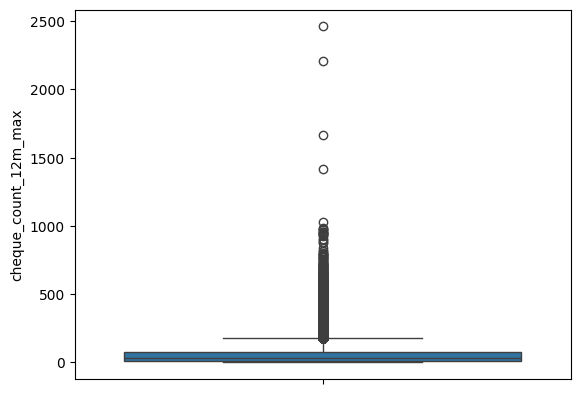

Column children
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0     40556   42144     42144   42170
1     test_1      5040    5213      5213    5216
2  control_0     13653   14215     14215   14228
3  control_1      1563    1617      1617    1617


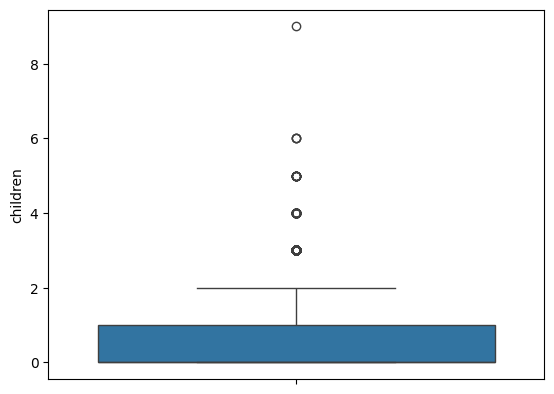

Column crazy_purchases_cheque_count_12m
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0     39815   40752     41087   41575
1     test_1      4082    4387      4507    4727
2  control_0     13453   13765     13879   14036
3  control_1      1275    1373      1408    1453


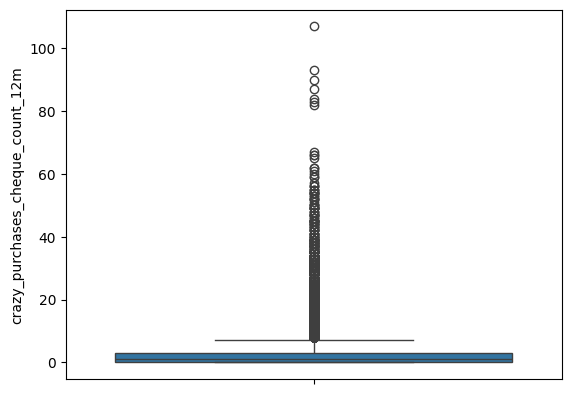

Column k_var_disc_share_6m_max
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0     42395   42415     42430   42435
1     test_1      5277    5285      5287    5292
2  control_0     14299   14307     14308   14310
3  control_1      1646    1647      1648    1649


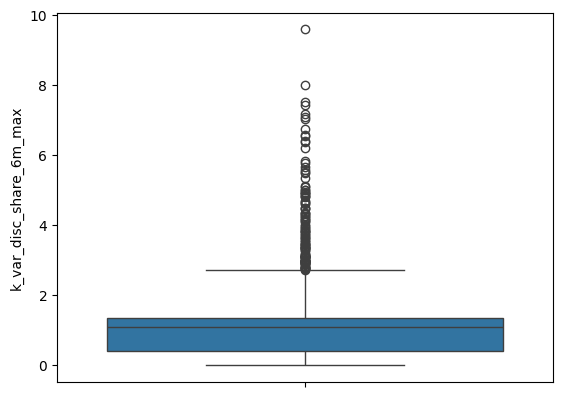

Column k_var_sku_price_6m_max
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0     42374   42455     42467   42471
1     test_1      5245    5295      5312    5314
2  control_0     14275   14310     14314   14319
3  control_1      1638    1651      1653    1655


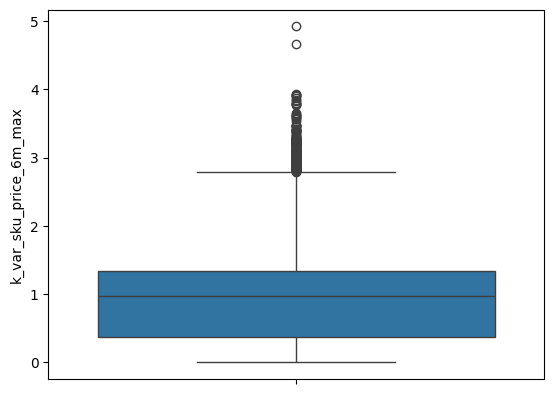

Column sale_sum_12m_sum
        Type  whis 1.5  whis 2  whis 2.5  whis 3
0     test_0     39614   40455     40988   41363
1     test_1      3861    4172      4383    4541
2  control_0     13399   13655     13817   13943
3  control_1      1209    1301      1360    1417


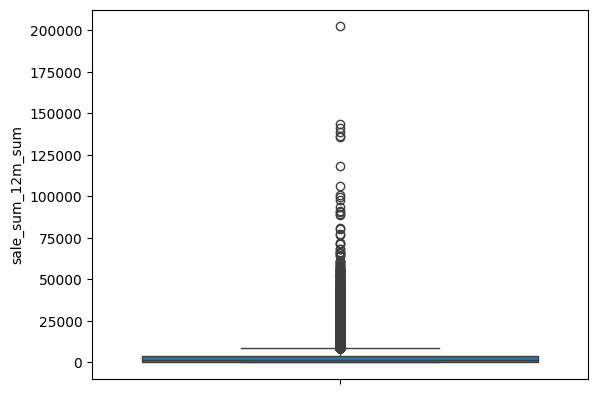

In [14]:
for key in collect_features.keys():
    print('Column', key)

    dataframe = {'Type' : ['test_0', 'test_1', 'control_0', 'control_1']}
    for whis in [1.5, 2, 2.5, 3]:
        IQR = pdf_outliers[key].quantile(0.75) - pdf_outliers[key].quantile(0.25)
        sample = pdf_outliers[pdf_outliers[key] <= pdf_outliers[key].quantile(0.75) + IQR * whis]
        sample_test = sample[sample['group'] == 0]['response_att'].value_counts()
        sample_control = sample[sample['group'] == 1]['response_att'].value_counts()

        dataframe['whis {}'.format(whis)] = [sample_test[0], sample_test[1], sample_control[0], sample_control[1]]

    print(pd.DataFrame(dataframe))
    sns.boxplot(pdf_outliers[key])
    plt.show()

<Axes: >

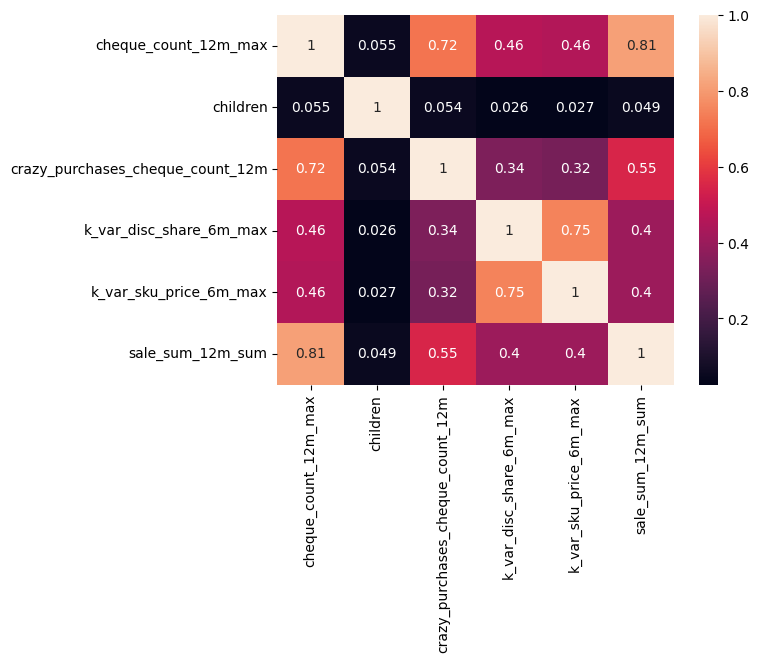

In [15]:
sns.heatmap(pdf_outliers[[key for key in collect_features.keys()]].corr(), annot=True)

In [16]:
def get_redundant_pairs(df):
  '''Get diagonal and lower trigangle pairs of correlation matrix'''
  pairs_to_drop = set()
  cols = df.columns
  for i in range(0, df.shape[1]):
    for j in range(0, i+1):
      pairs_to_drop.add((cols[i], cols[j]))
  return pairs_to_drop

def get_top_abs_correlation(df, a, b):
  au_corr = df.corr().abs().unstack()
  labels_to_drop = get_redundant_pairs(df)
  au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
  return au_corr[a:b]

print("Top Absolute Correlations")
print(get_top_abs_correlation(pdf, 0, 10))


Top Absolute Correlations
mean_discount_depth_15d          promo_share_15d                 0.981877
k_var_cheque_category_width_15d  k_var_cheque_group_width_15d    0.972995
                                 k_var_sku_per_cheque_15d        0.969472
sale_count_6m_g33                sale_sum_6m_g33                 0.948899
k_var_cheque_group_width_15d     k_var_sku_per_cheque_15d        0.942750
sale_count_12m_g54               sale_sum_12m_g54                0.940047
k_var_discount_depth_15d         stdev_discount_depth_15d        0.939597
sale_count_6m_g54                sale_sum_6m_g54                 0.938994
sale_count_3m_g33                sale_sum_3m_g33                 0.938911
cheque_count_12m_g33             cheque_count_6m_g33             0.934082
dtype: float64


In [18]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, a, b):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[a:b]

print("Top Absolute Correlations")
print(get_top_abs_correlations(pdf, 0, 10))

Top Absolute Correlations
mean_discount_depth_15d          promo_share_15d                 0.981877
k_var_cheque_category_width_15d  k_var_cheque_group_width_15d    0.972995
                                 k_var_sku_per_cheque_15d        0.969472
sale_count_6m_g33                sale_sum_6m_g33                 0.948899
k_var_cheque_group_width_15d     k_var_sku_per_cheque_15d        0.942750
sale_count_12m_g54               sale_sum_12m_g54                0.940047
k_var_discount_depth_15d         stdev_discount_depth_15d        0.939597
sale_count_6m_g54                sale_sum_6m_g54                 0.938994
sale_count_3m_g33                sale_sum_3m_g33                 0.938911
cheque_count_12m_g33             cheque_count_6m_g33             0.934082
dtype: float64


**Test vs Control**

<Axes: xlabel='group', ylabel='count'>

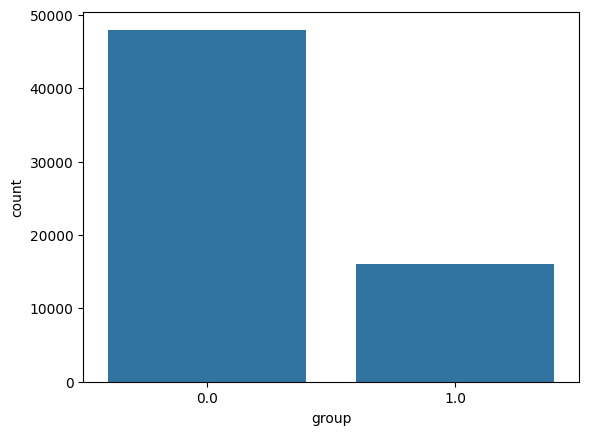

In [19]:
sns.countplot(x="group", data=pdf)


/tmp/ipython-input-861617508.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['response_sms'], label='test')
/tmp/ipython-input-861617508.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control['response_sms'], label='control')


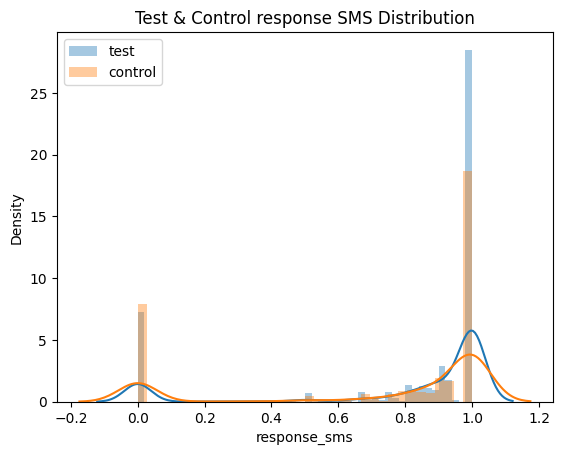

In [20]:
test = pdf[pdf['group'] == 0]

control = pdf[pdf['group'] == 1]

sns.distplot(test['response_sms'], label='test')
sns.distplot(control['response_sms'], label='control')
plt.title('Test & Control response SMS Distribution')
plt.legend()
plt.show()

If curves overlap → GOOD experiment ✔

If curves very different → selection bias X

/tmp/ipython-input-845648084.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['age'], label='test')
/tmp/ipython-input-845648084.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control['age'], label='control')


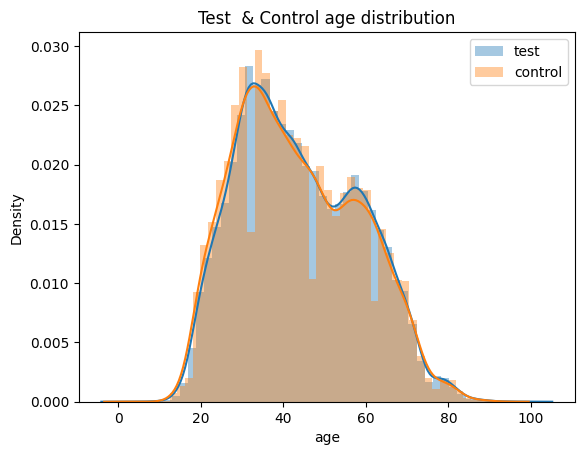

In [21]:
test  = pdf[pdf['group'] == 0]
control = pdf[pdf['group'] == 1]

sns.distplot(test['age'], label='test')
sns.distplot(control['age'], label='control')
plt.title('Test  & Control age distribution')

plt.legend()
plt.show()

**Comparsio on some feature**

We will divide customers into 2 classes depending on whether they participate in the promotion.

In [22]:
# Test participants who didn't take part in event
stubborn_test = pdf[pdf['group'] == 0]
stubborn_test  = stubborn_test[stubborn_test['response_att'] == 0]

# test partici[pants who took part in event
active_test = pdf[pdf['group'] == 0]
active_test = active_test[active_test['response_att'] == 1]


In [23]:
# Control participants who didn't take part in event
stubborn_control = pdf[pdf['group'] == 1]
stubborn_control = stubborn_control[stubborn_control['response_att'] == 0]

# Control participants who took part in event
active_control = pdf[pdf['group'] == 1]
active_control = active_control[active_control['response_att'] == 1]

/tmp/ipython-input-496570951.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(active_test['response_sms'], ax=axs[0, 1])
/tmp/ipython-input-496570951.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(active_control['response_sms'], ax=axs[1, 1])


Text(0, 0.5, 'Control group')

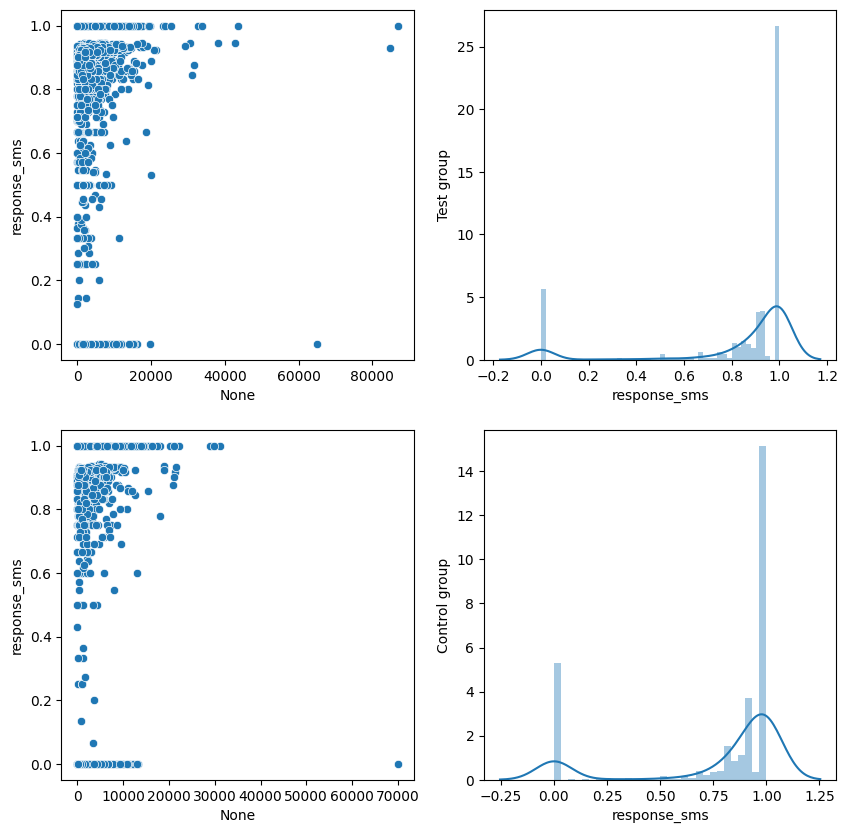

In [24]:
sales_sum = ['sale_sum_3m_g{}'.format(i) for i in [24, 26, 32, 33]]

f, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.scatterplot(x=active_test[sales_sum].sum(axis=1), y=active_test['response_sms'], ax=axs[0, 0])
sns.distplot(active_test['response_sms'], ax=axs[0, 1])
axs[0, 1].set_ylabel('Test group')

sns.scatterplot(x=active_control[sales_sum].sum(axis=1), y=active_control['response_sms'], ax=axs[1, 0])
sns.distplot(active_control['response_sms'], ax=axs[1, 1])
axs[1, 1].set_ylabel('Control group')

We observe a Lwer right peak which corresepond to the probability od response to SMS 100% for the control sample.

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

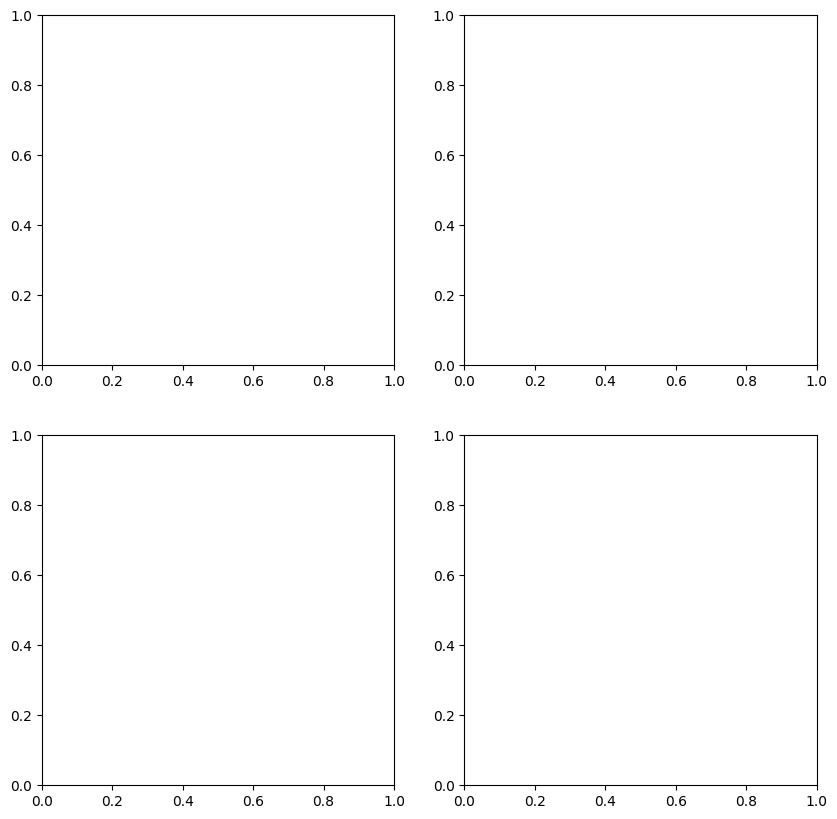

In [28]:
sales_sum = ['sale_sum_3m_g{}'.format(i) for i in [24, 26, 32, 33]]

f, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.scatterplot(stubborn_test[sales_sum].sum(axis=1), stubborn_test['response_sms'], ax=axs[0, 0])
sns.distplot(stubborn_test['response_sms'], ax=axs[0, 1])
axs[0, 1].set_ylabel('Test group')

sns.scatterplot(stubborn_control[sales_sum].sum(axis=1), stubborn_control['response_sms'], ax=axs[1, 0])
sns.distplot(stubborn_control['response_sms'], ax=axs[1, 1])
axs[1, 1].set_ylabel('Control group')

<Axes: xlabel='group', ylabel='response_att'>

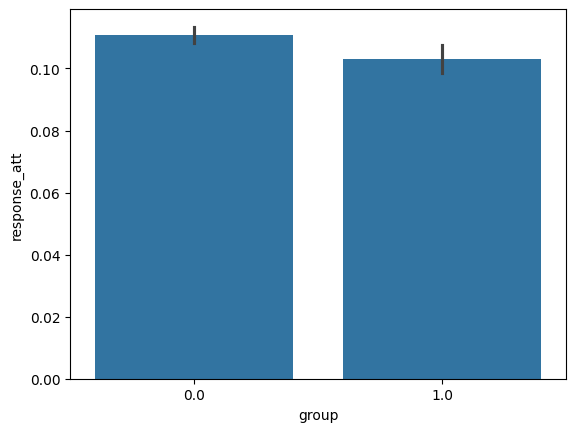

In [27]:
sns.barplot(x = 'group', y='response_att', data=pdf)


Inthe interaction proportion of customers who completed the target action is 11.01%. Without interaction . 10.25% So tge effect of the mailing increment this share by 0.75%.

**About Uplift Modeling**

Uplift modeling estimates the effective of communication action on some customer outcome and gives an oppertunity to efficient target customer which are most like to respond to a market campaign.

Companies use various channels to promote to a customer: It can be SMS, push notification , chatbot message insocial media in social network  and many other ways.

The Look-alike model

The Response model

The uplift model


**Types of Customers**

We can determne 4 types od customers based on a respond to a treatment:

1. *Do-Not-Distrub*(a.k.a- sleeping dogs) have a strong negative respnd to a marketing communication.
they are going to purches if NOT treated and will NOT purches IF Treated. It is not only a wasted marketing but also a negative impact.

2. *Lost Cause* Will NOT purches the product NO MATTER they are contacted or not. the marketing budget in this case is also wastes because it has no effect.

3. *Sure Things* will purchese ANYWAY no matter they are cntacted or Not . there is no motivation  to spend the budget because it also has no effect.

4. *Persuadables* will always repond POSITIVE to the merket communication. They is going to purcheses ONLY if contacted (or sometimes they pruc.. MORE )



In [31]:
!pip install scikit-uplift -q

from sklearn.model_selection import train_test_split
from sklift.models import ClassTransformation
from sklift.viz.base import plot_uplift_by_percentile
from sklift.metrics import uplift_at_k, uplift_auc_score, qini_auc_score
from sklearn.base import clone

from catboost import CatBoostClassifier

seed=47

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.1 MB/s eta 0:00:00


ImportError: cannot import name 'check_matplotlib_support' from 'sklearn.utils' (/usr/local/lib/python3.12/dist-packages/sklearn/utils/__init__.py)